<a href="https://colab.research.google.com/github/MarkG/my-ml-practices/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
# single linear regression
# Problem: we have collected data on class size and test scores for sample of students and we want to model the relationship between class size and the test scores.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# students_data = pd.read_csv('students.csv')
# students_data = pd.DataFrame(data = {
#   'class_size': [20, 25, 30, 35, 40],
#   'test_score': [75, 80, 85, 90, 95]
# })
# Generate DataFrame with test scores with a negative correlation to class size
class_sizes = np.random.randint(15, 40, size=100)
test_scores = 100 - (class_sizes + 15) + np.random.normal(0, 10, size=100)
# print(test_scores)
students_data = pd.DataFrame({'class_size': class_sizes, 'test_score': test_scores})

# create the X (class size) and y (test score) arrays
X = students_data[['class_size']]
y = students_data['test_score']

# fit the model to the data
reg = LinearRegression().fit(X, y)

# print the coefficiancy
print(f'Coefficiency:{reg.coef_}, Intercept: {reg.intercept_}') # Coefficiancy:[0.40482578], Intercept: 63.16976575973032

Coefficiency:[-1.13903358], Intercept: 88.67269165300672


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(353, 10) (89, 10) (353,) (89,)
MSE: 2900.193628493482
MAE: 42.79409467959994
R2: 0.4526027629719195
Intercept: 151.34560453985995
Coef: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


<ipython-input-1-a74f63b88383>:48: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


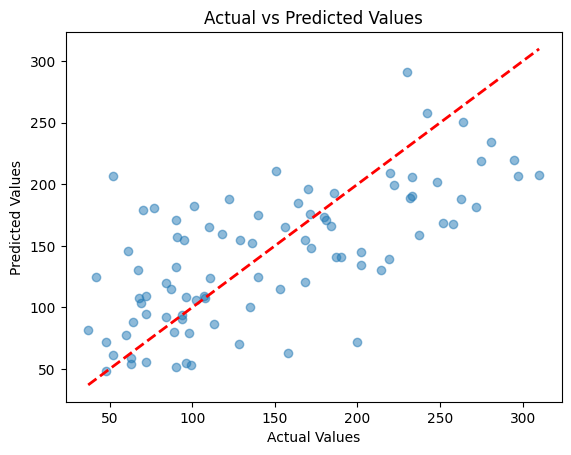

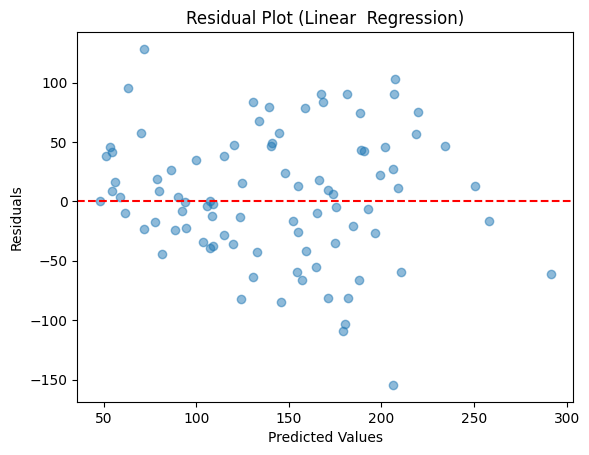

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

diabities = load_diabetes()
print(diabities.keys())

# Convert the data to  pandas df
diabetes_df = pd.DataFrame(data = diabities.data, columns = diabities.feature_names)
diabetes_df['target'] = diabities.target # Min: 25.0, Max: 346.0
# print(f'Min: {diabetes_df["target"].min()}, Max: {diabetes_df["target"].max()}')
# print(diabetes_df['target'].head())
X = diabetes_df.drop('target', axis = 1)
y = diabetes_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
lr = LinearRegression()
# train the model
lr.fit(X_train, y_train)
# predict on test
y_pred = lr.predict(X_test)
# ---- to evaluate performance of the model
# MSE - Lower is better - Avg Squerd distance between predicted and actual value
mse = mean_squared_error(y_test, y_pred)
# MAE - Lower is better - Avg Absolute distance between predicted and actual value
mae = mean_absolute_error(y_test, y_pred)
# r2 - How well model fits data, Higher is better. vaiance of the dependent variable (target), explained by independent variable (feature)
r2 = r2_score(y_test, y_pred)
# Intercept: starting point of the regression line on the y-axis
# Value of dependent variable (target) when the independent variables (features) are zero
# If positive - target increases as features increase, if negative - opposite
intercept = lr.intercept_
coef = lr.coef_
print(f'MSE: {mse}\nMAE: {mae}\nR2: {r2}\nIntercept: {intercept}\nCoef: {coef}')

# Plot predicted vs actual values
# Predicted values of the target are plotted on the x-axis
# Actual values of the target are plotted on the y-axis
# If the model is a good fit, the points should be close to the diagonal line,
# indicating a strong linear relationship between the actual and predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Plot residuals
# The residuals are plotted agains thepredicted values of the target variavble.
# If the linear regression model is a good fit for the data,
# the residual plot should show a random scatter of th epoints around zero
# with no discernable trend.
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear  Regression)')
plt.show()
